In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("../saved/250k_journal_conf_last20.csv")

In [2]:
df.columns.tolist()

['PaperId',
 'Abstract',
 'Author_1',
 'Author_10',
 'Author_11',
 'Author_12',
 'Author_13',
 'Author_14',
 'Author_15',
 'Author_2',
 'Author_3',
 'Author_4',
 'Author_5',
 'Author_6',
 'Author_7',
 'Author_8',
 'Author_9',
 'CitationCount',
 'CitationCountPerYear',
 'FieldOfStudy_0',
 'FieldOfStudy_1',
 'FieldOfStudy_2',
 'FieldOfStudy_3',
 'FieldOfStudy_4',
 'FieldOfStudy_5',
 'FirstPage',
 'JournalName',
 'LastPage',
 'PaperId.1',
 'PublishedDate',
 'Publisher',
 'Rank',
 'Title',
 'YearsSincePublication',
 'AuthorProminence',
 'MagBin',
 'CitationBin']

In [6]:
df_cs = df.loc[df["FieldOfStudy_0"] == "computer science"]
cc = df_cs["CitationCount"].values
cc.shape

(11743,)

In [20]:
print(f"Max number of citations: {np.max(cc)}")
print(f"Median number of citations: {np.median(cc)}")
print(f"Mean number of citations: {np.mean(cc)}")
print(f"Std number of citations: {np.std(cc)}")

print(f"Number of papers with 0 citations: {np.sum((cc == 0))}")
print(f"Number papers with over 50 citations: {np.sum(cc > 50)}")
print(f"Number papers with over 100 citations: {np.sum(cc > 100)}")
print(f"Number papers with over 1k citations: {np.sum(cc > 1000)}")
print(f"Number papers with over 10k citations: {np.sum(cc > 10000)}")


Max number of citations: 26152
Median number of citations: 3.0
Mean number of citations: 21.143319424337903
Std number of citations: 259.8696887155628
Number of papers with 0 citations: 2747
Number papers with over 50 citations: 1056
Number papers with over 100 citations: 473
Number papers with over 1k citations: 13
Number papers with over 10k citations: 1


KElbowVisualizer(ax=<AxesSubplot:>, k=None, model=None)

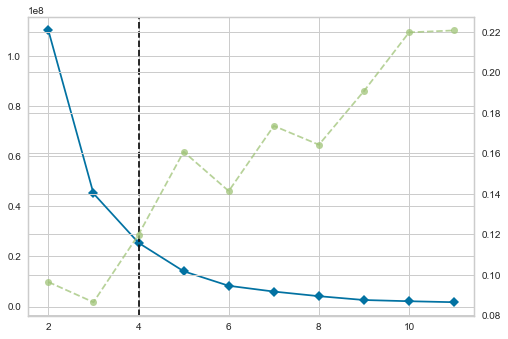

In [11]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12))
visualizer.fit(cc.reshape(-1, 1))

In [14]:
clstr = KMeans(n_clusters=3, random_state=0)
clstr.fit(cc.reshape(-1,1))
clstr.cluster_centers_

array([[1.68565584e+01],
       [2.61520000e+04],
       [2.70622222e+03]])

In [15]:
from sklearn.mixture import GaussianMixture as GMM
gmm = GMM(n_components=4, random_state=0)
gmm.fit(cc.reshape(-1,1))
gmm.means_

array([[2.88698968e+00],
       [2.61520000e+04],
       [3.38373531e+02],
       [3.80818280e+01]])

In [22]:
gmm.predict([[3]])

array([0])

In [31]:
df_cs.drop(labels=[
'PaperId',
'Author_1',
'Author_10',
'Author_11',
'Author_12',
'Author_13',
'Author_14',
'Author_15',
'Author_2',
'Author_3',
'Author_4',
'Author_5',
'Author_6',
'Author_7',
'Author_8',
'Author_9',
'FieldOfStudy_0',
'FieldOfStudy_1',
'FieldOfStudy_2',
'FieldOfStudy_3',
'FieldOfStudy_4',
'FieldOfStudy_5',
'FirstPage',
'JournalName',
'LastPage',
'PaperId.1',
'PublishedDate',
'Publisher'
], inplace=True, axis=1)

,Abstract,CitationCount,CitationCountPerYear,Rank,Title,YearsSincePublication,AuthorProminence,MagBin,CitationBin,BinnedCitations
8,Fingertips detection has been used in many app...,26,2.636111,19261,An Efficient Real Time Method of Fingertip Det...,9.863014,0,1,0,3
12,We consider synchronization techniques require...,105,8.666893,18755,Synchronization of cooperative base stations,12.115068,0,1,0,3
18,Business Process Management (BPM) remains an i...,1,0.077726,22847,Strategies to Increase Executive Commitment to...,12.865753,0,2,0,0
47,Malan is a MApping LANguage that allows the g...,13,1.069416,20890,Malan: a mapping language for the data manipul...,12.156164,0,2,0,3
62,"In usability testing, eye tracking has been us...",19,1.345818,20985,Is Eye Tracking the Next Step in Usability Tes...,14.117808,0,2,0,3


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

def correlation(df, columns=None, plot=True):
    t = df.loc[:, columns] if columns else df
    if not plot:
        print(t.corr())
    else:
        fig = plt.figure()
        mask = np.triu(t.corr())
        sns.heatmap(
            t.corr(),
            mask=mask,
            cbar=False,
            square=True,
            annot=True,
            vmin=-1,
            vmax=1,
            center=0,
            cmap="coolwarm_r",
            linecolor="black",
        )
        plt.show()

In [ ]:
def custom_binning(x):
    if x <= 2.88698968e+00: 
        return 1
    elif x <= 3.80818280e+01:
        return 2
    elif x <= 50:
        return 3
    else:
        return 4


In [ ]:
df_cs["BinnedCitations"] = pd.Series(gmm.predict(cc.reshape(-1,1)).reshape(-1,), index=df_cs.index)
df_cs.head()

In [18]:
df_cs = df.loc[df["FieldOfStudy_0"] == "computer science"]
df_cs.head()

,PaperId,Abstract,Author_1,Author_10,Author_11,Author_12,Author_13,Author_14,Author_15,Author_2,...,LastPage,PaperId.1,PublishedDate,Publisher,Rank,Title,YearsSincePublication,AuthorProminence,MagBin,CitationBin
8,21,Fingertips detection has been used in many app...,2.250426e+09,NaN,NaN,NaN,NaN,NaN,NaN,2.106871e+09,...,NaN,1610614779,2011-01-01,NaN,19261,An Efficient Real Time Method of Fingertip Det...,9.863014,0,1,0
12,28,We consider synchronization techniques require...,2.274073e+09,NaN,NaN,NaN,NaN,NaN,NaN,2.878536e+09,...,334,2147486330,2008-10-01,IEEE,18755,Synchronization of cooperative base stations,12.115068,0,1,0
18,40,Business Process Management (BPM) remains an i...,2.145050e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1631,805310189,2008-01-01,NaN,22847,Strategies to Increase Executive Commitment to...,12.865753,0,2,0
47,99,Malan is a MApping LANguage that allows the g...,2.102816e+09,NaN,NaN,NaN,NaN,NaN,NaN,2.559648e+09,...,75,2013275448,2008-09-16,ACM,20890,Malan: a mapping language for the data manipul...,12.156164,0,2,0
62,137,"In usability testing, eye tracking has been us...",2.484060e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,242,2147496745,2006-10-01,IEEE,20985,Is Eye Tracking the Next Step in Usability Tes...,14.117808,0,2,0


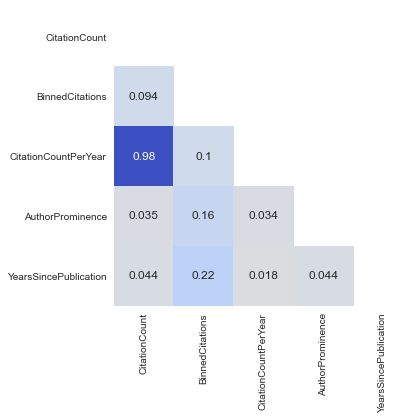

In [26]:
correlation(df_cs, columns=[
    "CitationCount",
    "BinnedCitations",
    "CitationCountPerYear",
    "AuthorProminence",
    "YearsSincePublication"
])